# Projeto Previsão de Vendas

O desafio é conseguir prever as vendas de um determinado período com base nos gastos em anúncios em 3 grandes redes: TV, Jornal e Rádio

In [2]:
# Importando base de dados

import pandas as pd

tabela = pd.read_csv("advertising.csv")

display(tabela)

display(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

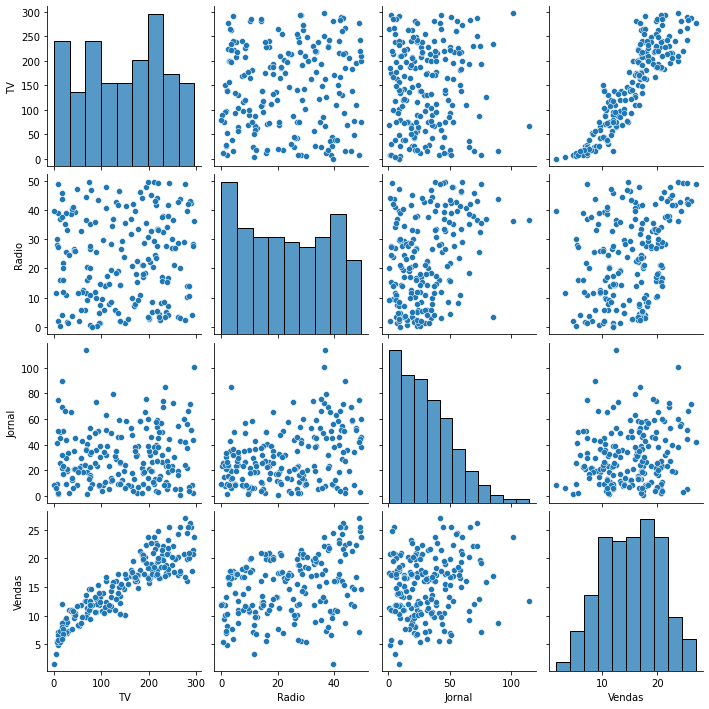

In [4]:
# Análise Exploratória

import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico de correlação
sns.pairplot(tabela)
plt.show()

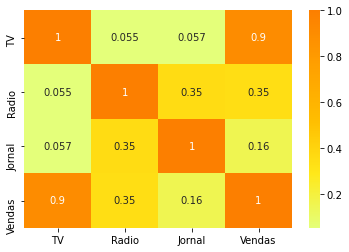

In [9]:
# Mapa de calor

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()

TV e Vendas tem uma forte correlação (0,90), quando um sobe, o outro sobe junto. Radio tem uma baixa correlação (0,35). Já jornal praticamente não tem correlação (0,16).


In [13]:
#Preparação de dados para IA: separando dados de teste e dados de treino

from sklearn.model_selection import train_test_split

x = tabela.drop("Vendas", axis=1)
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


In [16]:
# Criando AI

# Regressão Linear
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_treino, y_treino)

# Random forest
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
randomforest.fit(x_treino, y_treino)

LinearRegression()

In [19]:
# Verificando o melhor modelo
# R² -> diz o % que o nosso modelo consegue explicar o que acontece
# MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

from sklearn import metrics

#Previsões
teste_linear = linear.predict(x_teste)
teste_randomforest = randomforest.predict(x_teste)

# R²
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_randomforest = metrics.r2_score(y_teste, teste_randomforest)
print(r2_linear, r2_randomforest)

# MSE
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_randomforest = metrics.mean_squared_error(y_teste, teste_randomforest)
print(erro_linear, erro_randomforest)

0.8919625465686885 0.9549872818769087
3.7181581769007073 1.5491331999999964


In [22]:
# Visualização das previsões

# Tabela
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste
tabela_comparacao["Previsão Random"] = teste_randomforest
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

display(tabela_comparacao)

,Vendas Reais,Previsão Random
0,19.7,19.444
1,16.1,20.190
2,25.4,24.124
3,11.3,11.413
4,11.6,11.377
5,8.7,8.288
6,20.5,20.204
7,17.6,20.088
8,25.4,24.783
9,26.2,24.648


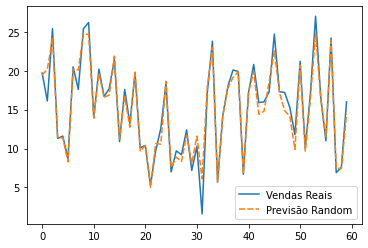

In [23]:
# Gráfico

sns.lineplot(data=tabela_comparacao)
plt.show()

[0.86390907 0.1202281  0.01586283]


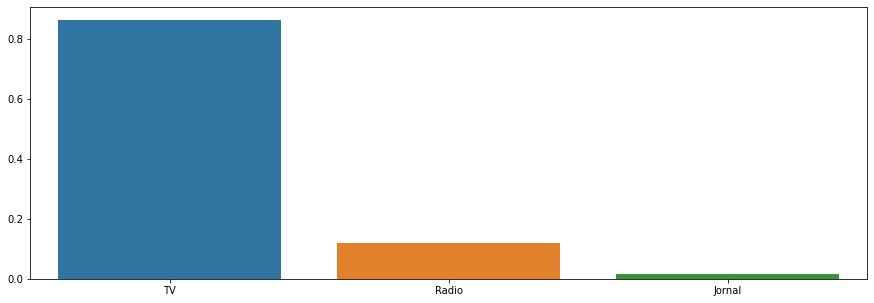

In [37]:
#Importância das variáveis

print(randomforest.feature_importances_)

plt.figure(figsize=(15, 5))
sns.barplot(x=x_treino.columns, y=randomforest.feature_importances_)
plt.show()

In [34]:
print(tabela.sum())

TV        29408.5
Radio      4652.8
Jornal     6110.8
Vendas     3026.1
dtype: float64


# Conclusão
Foi se gasto mais em TV, mas como essa variável é a mais importante para as vendas, não há problema. 

Porém entre rádio e jornal a divisão não está tão boa, pois foi-se gasto mais em jornal (6110.8) do que em radio, no entanto radio (0.12) é mais importante que o jornal para as vendas. 

Poderia jogar mais recursos em TV ou radio e diminuir o valor de jornal.